<a href="https://colab.research.google.com/github/dradra0905/DataMiningWebNovel/blob/main/datamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
filename = './data.txt'

file = open(filename, "r", encoding='utf-8')
data = file.readlines()
file.close()

cleaned_data = [item.replace('\n', '') for item in data]
cleaned_data = [item.replace(',', '') for item in cleaned_data]
cleaned_data = [item.replace('만', '000') if '.' in item else item.replace('만', '0000') for item in cleaned_data]
cleaned_data = [item.replace('억', '0000000') if '.' in item else item.replace('억', '00000000') for item in cleaned_data]
cleaned_data = [item.replace('0000능', '만능') for item in cleaned_data]
cleaned_data = [item.replace('000능', '만능') for item in cleaned_data]
cleaned_data = [item.replace('.', '') for item in cleaned_data]
cleaned_data = [item.replace('#', ',') for item in cleaned_data]
cleaned_data = [item.replace('--------', '\n') for item in cleaned_data]

# 리스트를 하나의 문자열로 결합
data_str = ''.join(cleaned_data)

# 결합된 문자열을 '\n'을 기준으로 나눔
data_list = [item.strip() for item in data_str.split('\n') if item.strip()]
processed_data = []

for item in data_list:
    if ',' in item:
        # 쉼표(,)가 있는 경우 쉼표를 기준으로 분할하여 리스트로 추가
        item_list = item.split(',')
        processed_data.append(item_list)
    else:
        # 쉼표(,)가 없는 경우 단일 항목 리스트로 추가
        processed_data.append([item])

new_data = []

for sublist in processed_data:
    if sublist:
        first_element = int(sublist[0])
        new_value = first_element // 100000

        for _ in range(1):
            # 원본 리스트의 첫 번째 요소를 10만으로 나눈 값을 추가하는 부분
            new_sublist = sublist.copy()
            new_data.append(new_sublist)


processed_data_filtered = [item[1:] for item in new_data if len(item) > 1]
# 단어 치환 함수
def replace_words(sentence, original_word, replacement_word):
    return [replacement_word if original_word in word else word for word in sentence]

# "0000남"을 "만남"으로 바꾸기
replaced_sentences = [replace_words(sentence, "0000남", "만남") for sentence in processed_data_filtered]
replaced_sentences = [replace_words(sentence, "000남", "만남") for sentence in replaced_sentences]
replaced_sentences = [replace_words(sentence, "00000000", "억") for sentence in replaced_sentences]

print(replaced_sentences)

[['로맨스판타지', '육아물', '빙의물', '인외존재', '다정남', '순정남', '직진남', '상처남', '대형견남', '직진녀', '다정녀', '엉뚱발랄녀', '친구>연인', '소꿉친구', '힐링물'], ['로맨스판타지', '육아물', '성장물', '환생물', '가족물', '무협물', '여주판타지', '첫사랑', '천재', '왕족/귀족', '카리스마남', '능력남', '능력녀', '외유내강', '걸크러쉬'], ['차원이동', '정통', '빙의', '조력자', '검사', '망나니', '왕족/귀족', '이능력', '마왕', '성장', '초능력'], ['로맨스판타지', '가상시대물', '드라마', '달달물', '힐링물', '암투물', '삼각관계', '능력녀', '무심녀', '철벽녀', '뇌섹녀', '능력남', '존댓말남', '피폐물', '역하렘'], ['미스테리', '빙의', '성좌', '방송', '시스템', '천재', '노력', '성장', '착각', '조력자', '고인물', '가수'], ['성장', '육아'], ['차원이동', '게임', '천재', '빙의', '망나니', '만능', '시스템'], ['전문직', '회귀', '시스템', '노력', '성장', '조력자', '매니저', '가수'], ['정통', '복수', '생존', '천재', '노력', '성장', '지존'], ['천재', '성장', '마법사', '하렘', '생존', '학원', '마왕', '먼치킨', '만능', '노력', '성직자', '네크로맨서'], ['아포칼립스', '격투가', '천재', '기갑', 'SF', '조력자'], ['마왕', '차원이동', '생존', '마계', '성장', '시스템'], ['정령', '정령술사', '정통', '복수', '생존', '회귀'], ['정통', '복수', '영웅/신화', '노력', '성장', '아티팩트', '살수'], ['환생', '복수', '깽판', '천재', '성장', '착각', '망나니', '검', '지존', '협객'], ['정통', '환생', '학원', '

In [2]:
element_counts = {}

# 데이터 처리
for sublist in replaced_sentences:
    for element in sublist:
        if element in element_counts:
            element_counts[element]["count"] += 1
            element_counts[element]["individual_count"] = len(sublist)
        else:
            element_counts[element] = {"count": 1, "individual_count": len(sublist)}

# 등장 횟수(count)를 기준으로 딕셔너리를 정렬
sorted_counts = sorted(element_counts.items(), key=lambda x: x[1]["count"], reverse=True)
scount=0
# 결과 출력
for element, counts in sorted_counts:
    count = counts["count"]
    scount+=1
    print(f"{element}: {count}, Count: {scount}")

성장: 61, Count: 1
천재: 55, Count: 2
로맨스판타지: 53, Count: 3
먼치킨: 48, Count: 4
회귀: 41, Count: 5
능력녀: 37, Count: 6
노력: 35, Count: 7
빙의물: 31, Count: 8
왕족/귀족: 29, Count: 9
다정남: 25, Count: 10
능력남: 25, Count: 11
시스템: 24, Count: 12
전문직: 24, Count: 13
생존: 24, Count: 14
정통: 23, Count: 15
빙의: 22, Count: 16
복수: 21, Count: 17
걸크러쉬: 19, Count: 18
환생: 18, Count: 19
전쟁: 18, Count: 20
순정남: 17, Count: 21
성장물: 16, Count: 22
집착남: 16, Count: 23
차원이동: 15, Count: 24
조력자: 15, Count: 25
고인물: 15, Count: 26
여주판타지: 14, Count: 27
재벌: 14, Count: 28
방송: 13, Count: 29
로맨틱코미디: 13, Count: 30
힐링물: 12, Count: 31
무심녀: 12, Count: 32
착각: 12, Count: 33
사이다녀: 12, Count: 34
대체역사: 12, Count: 35
경영/기업: 12, Count: 36
회귀물: 11, Count: 37
귀환: 11, Count: 38
이능력: 10, Count: 39
게임: 10, Count: 40
마법사: 10, Count: 41
육아물: 9, Count: 42
상처남: 9, Count: 43
검사: 9, Count: 44
존댓말남: 9, Count: 45
학원: 9, Count: 46
아포칼립스: 9, Count: 47
깽판: 9, Count: 48
능글남: 9, Count: 49
레이드: 9, Count: 50
오해물: 9, Count: 51
스포츠: 9, Count: 52
다정녀: 8, Count: 53
환생물: 8, Count

In [13]:
from itertools import combinations
import numpy as np
import csv

def jaccard_distance(set1, set2):
    intersection_size = len(set1.intersection(set2))
    union_size = len(set1.union(set2))
    return 1 - intersection_size / union_size if union_size != 0 else 0

# 데이터에서 유일한 단어 및 단어의 등장 횟수 추출
word_counts = {}
for sublist in replaced_sentences:
    for word in sublist:
        word_counts[word] = word_counts.get(word, 0) + 1

# 4회 이하로 등장한 단어 필터링
filtered_words = [word for word, count in word_counts.items() if count > 4]

# Jaccard 거리 행렬 초기화
num_unique_words = len(filtered_words)
jaccard_distance_matrix = np.zeros((num_unique_words, num_unique_words))

# 모든 단어 쌍에 대한 Jaccard distance 계산 및 행렬에 저장
for i, word1 in enumerate(filtered_words):
    for j, word2 in enumerate(filtered_words):
        if i < j:  # 행렬의 대각선 및 반대편은 계산할 필요 없음
            set1 = set(word for sublist in replaced_sentences if word1 in sublist for word in sublist)
            set2 = set(word for sublist in replaced_sentences if word2 in sublist for word in sublist)
            distance = jaccard_distance(set1, set2)

            jaccard_distance_matrix[i, j] = distance
            jaccard_distance_matrix[j, i] = distance  # 대칭성을 유지하기 위해 반대편도 채움

# 결과를 CSV 파일에 저장
csv_filename = "jaccard_distance_matrix_filtered.csv"
with open(csv_filename, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file, delimiter=',')
    writer.writerows(jaccard_distance_matrix)

print(f"Filtered Jaccard distance matrix saved to '{csv_filename}'")

Filtered Jaccard distance matrix saved to 'jaccard_distance_matrix_filtered.csv'


In [35]:
from sklearn.cluster import KMeans
import numpy as np

# Jaccard Similarity 파일 읽어오기
similarities = np.loadtxt('jaccard_distance_matrix_filtered.csv', delimiter=',')

# KMeans 클러스터링
k = 6 # Choose the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(similarities)

# 클러스터 결과 출력
labels = kmeans.labels_

# 클러스터별로 속한 단어들을 모아 출력
clusters = [[] for _ in range(k)]

# Assuming unique_words contains the original words
for word, cluster in zip(filtered_words, labels):
    clusters[cluster].append(word)

# 출력
for i, words_in_cluster in enumerate(clusters):
    print(f"Cluster {i + 1}: {', '.join(words_in_cluster)}")

Cluster 1: 천재, 정통, 빙의, 조력자, 성장, 노력, 착각, 고인물, 회귀, 복수, 생존, 먼치킨, 환생, 귀환
Cluster 2: 로맨스판타지, 육아물, 빙의물, 다정남, 순정남, 상처남, 다정녀, 힐링물, 성장물, 여주판타지, 첫사랑, 왕족/귀족, 능력남, 능력녀, 걸크러쉬, 존댓말남, 회귀물, 집착남, 사이다녀, 로맨틱코미디, 권선징악, 운명, 소유욕/독점욕, 털털녀
Cluster 3: 차원이동, 검사, 망나니, 이능력, 시스템, 게임, 만능, 마법사, 학원, 영웅/신화, 아티팩트, 깽판, 마검사, 전쟁, 무공, 레이드, 용사
Cluster 4: 육아, 아포칼립스, 정령, 검, 신, 대체역사, 군인, 정치가, 영지, 천마
Cluster 5: 인외존재, 직진남, 대형견남, 엉뚱발랄녀, 소꿉친구, 환생물, 카리스마남, 외유내강, 가상시대물, 달달물, 무심녀, 철벽녀, 역하렘, 재회물, 능글남, 초월적존재, 계략남, 오해물, 계략녀, 복수물, 상처녀, 갑을관계, 짝사랑남, 까칠남, 라이벌/앙숙, 계약관계, 신분차이, 영혼체인지, 타임슬립
Cluster 6: 방송, 가수, 전문직, 메디컬, 경영/기업, 재벌, 스포츠, 작가, 배우


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


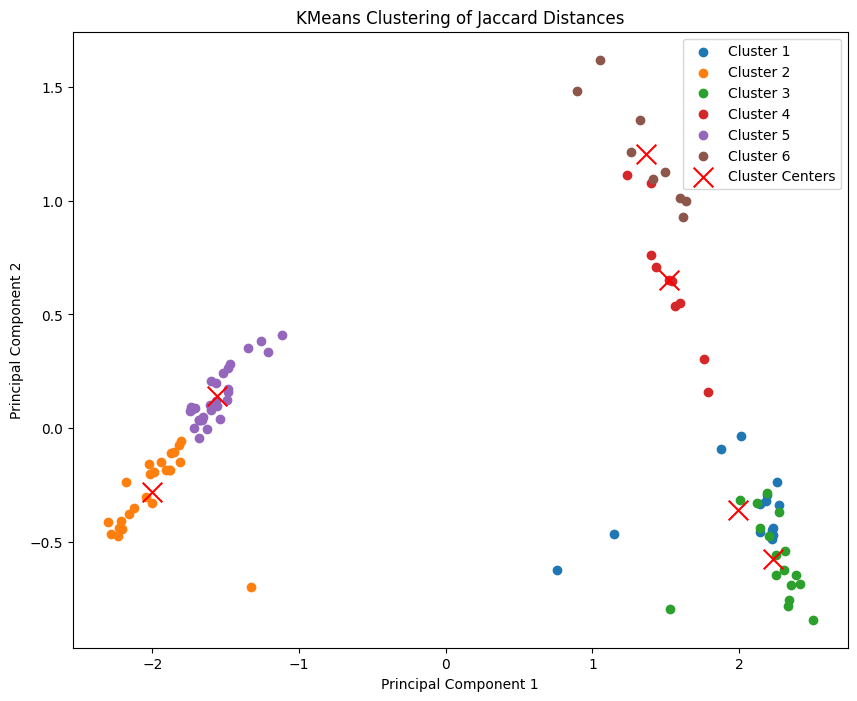

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA를 사용하여 차원을 2로 축소
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(similarities)

# KMeans 클러스터 중심의 위치를 구함
reduced_centers = pca.transform(kmeans.cluster_centers_)

# 각 데이터 포인트를 클러스터별로 색상을 다르게 표시
plt.figure(figsize=(10, 8))
for i in range(k):
    points_in_cluster = reduced_features[labels == i]
    plt.scatter(points_in_cluster[:, 0], points_in_cluster[:, 1], label=f'Cluster {i + 1}')

# 클러스터 중심도 표시
plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], marker='x', s=200, c='red', label='Cluster Centers')

plt.title('KMeans Clustering of Jaccard Distances')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [6]:
!pip install matplotlib

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

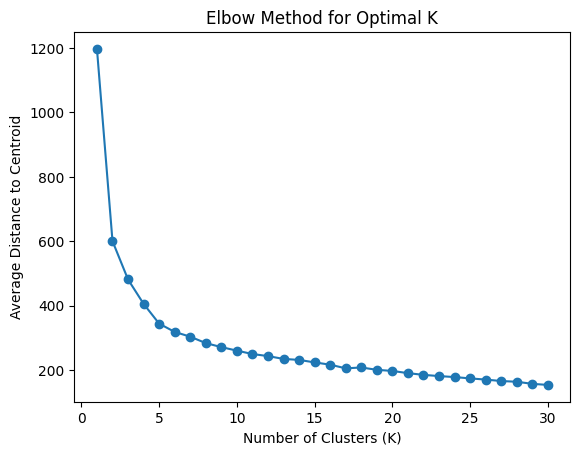

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Jaccard Similarity 파일 읽어오기
similarities = np.loadtxt('jaccard_distance_matrix.csv', delimiter=',')

# 최적의 K를 찾기 위한 Elbow Method
max_k = 30  # 최대 클러스터 수
distortions = []

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(similarities)
    distortions.append(kmeans.inertia_)

# Elbow Method 그래프
plt.plot(range(1, max_k + 1), distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Distance to Centroid')
plt.show()